Modify the scratch code of gaussian mixture clustering in our lecture:
- Modify so it performs early stopping when the log likelihood does not improve anymore.  Note that if you log the normal distribution, you will get negative sign.  Thus if you ignore the negative sign, it will become negative likelihood, and thus will get smaller and smaller.
- Perform plotting every 5 iterations on the resulting clusters.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import make_blobs

In [6]:
X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)

In [7]:
class GaussianMixtureModel:
    def __init__(self, K=3, max_iter=100, early_stop=5):
        self.K = K
        self.max_iter = max_iter
        self.early_stop = early_stop

    def fit(self, X, show_plot=False):
        m, n = X.shape
        r = np.full(shape=(m, self.K), fill_value=1/self.K)
        self.pi = np.full((self.K, ), fill_value=1/self.K)

        random_row = np.random.randint(low=0, high=m, size=self.K)
        self.mean = np.array([X[idx,:] for idx in random_row ]).T

        self.cov = np.array([np.cov(X.T) for _ in range (self.K)])

        last_likelihood = 0

        for iteration in range(self.max_iter):
            likelihood = 0
            for i in range(m):
                for k in range(self.K):
                    xi_pdf = multivariate_normal.pdf(X[i], mean=self.mean[:, k], cov=self.cov[k])
                    r[i, k] = self.pi[k] * xi_pdf
                    # For likelihood if I use log the value will be too large so I didn't use log here.
                    # This is to make early stop work.
                    likelihood += (self.pi[k]) + (xi_pdf) 
                r[i] /= np.sum(r[i])
            
            if np.abs(last_likelihood - likelihood) < self.early_stop:
                print("Early stop")
                break

            last_likelihood = likelihood

            if show_plot and iteration % 5 == 0 :
                yhat = np.argmax(r, axis=1)
                plt.figure(figsize=(5, 2))
                plt.title(f"Iteration: {iteration}")
                plt.scatter(X[:,0], X[:,1], c=yhat)
                plt.show()

            
            #===M-Step====
            # Find NK first for latter use
            NK = np.sum(r, axis=0)
            
            #PI
            self.pi = NK / m
            
            #mean
            self.mean =  ( X.T @ r ) / NK

            #covariance (also called Sigma)
            self.cov = np.zeros((self.K, n, n))
            for k in range(self.K):
                for i in range(m):
                    X_mean = (X[i]-self.mean[:, k]).reshape(-1, 1)
                    self.cov[k] += r[i, k] * (X_mean @ X_mean.T)
                self.cov[k] /= NK[k]

    def predict(self, X):
        m, n = X.shape
        r = np.full(shape=(m, self.K), fill_value=1/self.K)
        for i in range(m):
            for k in range(self.K):
                xi_pdf = multivariate_normal.pdf(X[i], mean=self.mean[:, k], cov=self.cov[k])
                r[i, k] = self.pi[k] * xi_pdf
            r[i] /= np.sum(r[i])
        return np.argmax(r, axis=1)

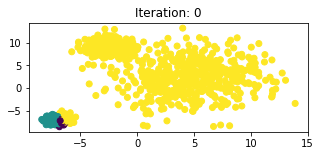

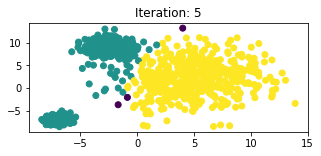

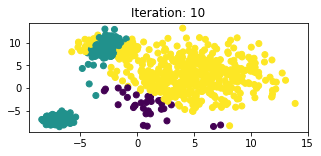

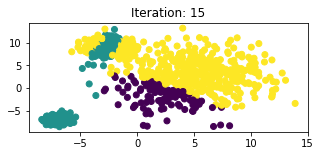

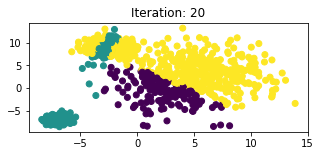

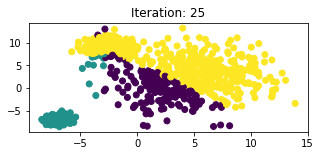

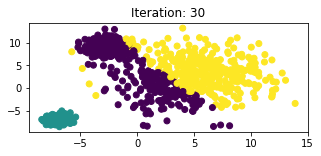

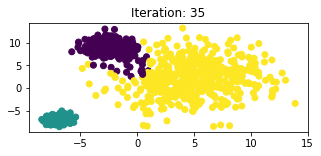

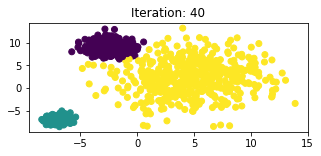

Early stop


In [9]:
model = GaussianMixtureModel(K=3, max_iter=100, early_stop=0.001)
model.fit(X, show_plot=True)